# Introduction to Neural Network classification with Tensorflow 

Classification problems can be any of the following types :
* Binary Classification
* Multiclass Classification
* Multilabel Classification 

### Creating data to view and fit

In [3]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [4]:
# features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

## Visualizing our data

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "Label":y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


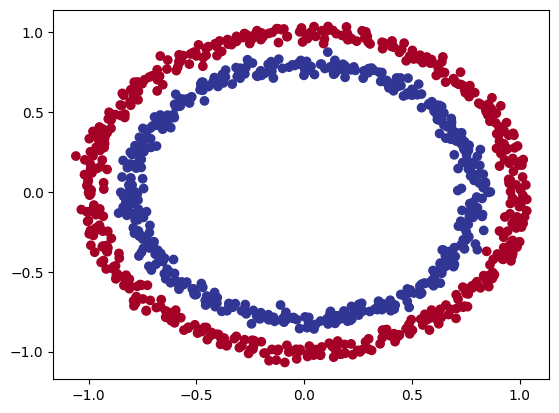

In [7]:
# plotting our data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [8]:
# Input and output shapes of our data
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# view the first example of samples and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [10]:
import tensorflow as tf
import keras
# set random seed
tf.random.set_seed(42)

# 1: Create the model
model_1 = keras.Sequential([
    keras.layers.Dense(1)
])

# 2: Compile the model
model_1.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3: Fit the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 4ms/step - loss: 4.8900 - accuracy: 0.5016
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.4073 - accuracy: 0.4985
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 3.8109 - accuracy: 0.4997
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 1.2902 - accuracy: 0.4977
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7083 - accuracy: 0.4978


In [11]:
# improve model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934650540351868, 0.5]

In [12]:
# add an extra layer and retrain
tf.random.set_seed(42)

# create model
model_2 = keras.Sequential([
    keras.layers.Dense(1),
    keras.layers.Dense(1)
])

# compile
model_2.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.SGD(),
                metrics=["accuracy"])

# fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932528018951416, 0.5]

## Improving our model
1. Create a model - add the number of layers or hidden units per layer
2. Compile the model - could change the optimization function to Adam
3. Fitting the model - could train the model for longer

In [14]:
tf.random.set_seed(42)

# create a model( 3 layers)
model_3 = keras.Sequential([
    keras.layers.Dense(100),
    keras.layers.Dense(10),
    keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5110


[0.6974099278450012, 0.5109999775886536]

Defining a function to plot our predictions against the true values. This function will
* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between the different (zones where each unique class falls)

In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model by predicting on x
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                        np.linspace(y_min, y_max, 100))
    
    # Create X values (to make predictions)
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    # check for multiclass
    if len(y_pred[0]) > 1:
        print("Doing multiclass prediction")
        # reshape our prediicton to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing dinary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundary
        plt.contour(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing dinary classification


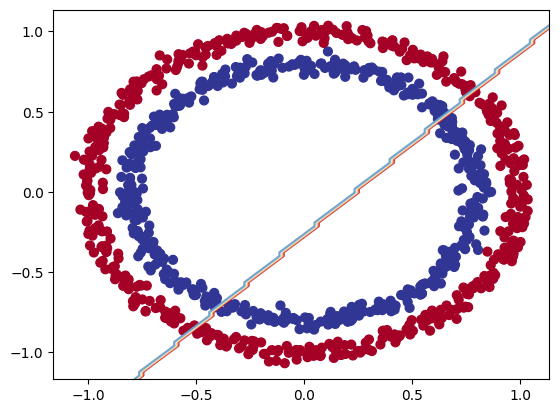

In [17]:
# check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

Our model seems to be trying to draw a straight line through the data. This means this model is more suited for a regression problem
We will try adappting it to a linear regression problem

In [18]:
tf.random.set_seed(42)

# create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)  #y = X + 100

X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [19]:
# split data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit the model to the data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/home/shesham/SoftwareDev/Python/Deep Learning with Tensorflow/baseEnv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/shesham/SoftwareDev/Python/Deep Learning with Tensorflow/baseEnv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/shesham/SoftwareDev/Python/Deep Learning with Tensorflow/baseEnv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/shesham/SoftwareDev/Python/Deep Learning with Tensorflow/baseEnv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/shesham/SoftwareDev/Python/Deep Learning with Tensorflow/baseEnv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/shesham/SoftwareDev/Python/Deep Learning with Tensorflow/baseEnv/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


In [20]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               300       
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


the model failed because it was built for binary classifiication not regression. We have to change the model to suit the data


In [21]:
# set seed
tf.random.set_seed(42)

# create the model
model_3 = keras.Sequential([
    keras.layers.Dense(100),
    keras.layers.Dense(10),
    keras.layers.Dense(1)
])

# compile
model_3.compile(loss=keras.losses.mae,
                optimizer=keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100,)

Epoch 1/100
5/5 [==============================] - 2s 7ms/step - loss: 500.3239 - mae: 500.3239
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 375.8992 - mae: 375.8992
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 256.2552 - mae: 256.2552
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 132.1354 - mae: 132.1354
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 51.4027 - mae: 51.4027
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 88.8127 - mae: 88.8127
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 74.2033 - mae: 74.2033
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 44.1739 - mae: 44.1739
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 50.8677 - mae: 50.8677
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 41.8299 - mae: 41.8299
Epoch 11/100
5/5 [==============================] -

5/5 [==============================] - 0s 5ms/step - loss: 41.1901 - mae: 41.1901
Epoch 23/100
5/5 [==============================] - 0s 5ms/step - loss: 41.0736 - mae: 41.0736
Epoch 24/100
5/5 [==============================] - 0s 5ms/step - loss: 41.0820 - mae: 41.0820
Epoch 25/100
5/5 [==============================] - 0s 7ms/step - loss: 40.9934 - mae: 40.9934
Epoch 26/100
5/5 [==============================] - 0s 10ms/step - loss: 40.9369 - mae: 40.9369
Epoch 27/100
5/5 [==============================] - 0s 7ms/step - loss: 40.9209 - mae: 40.9209
Epoch 28/100
5/5 [==============================] - 0s 8ms/step - loss: 41.1114 - mae: 41.1114
Epoch 29/100
5/5 [==============================] - 0s 9ms/step - loss: 41.0479 - mae: 41.0479
Epoch 30/100
5/5 [==============================] - 0s 9ms/step - loss: 40.8737 - mae: 40.8737
Epoch 31/100
5/5 [==============================] - 0s 11ms/step - loss: 41.4932 - mae: 41.4932
Epoch 32/100
5/5 [==============================] - 0s 9ms/st

2/2 [==============================] - 0s 8ms/step


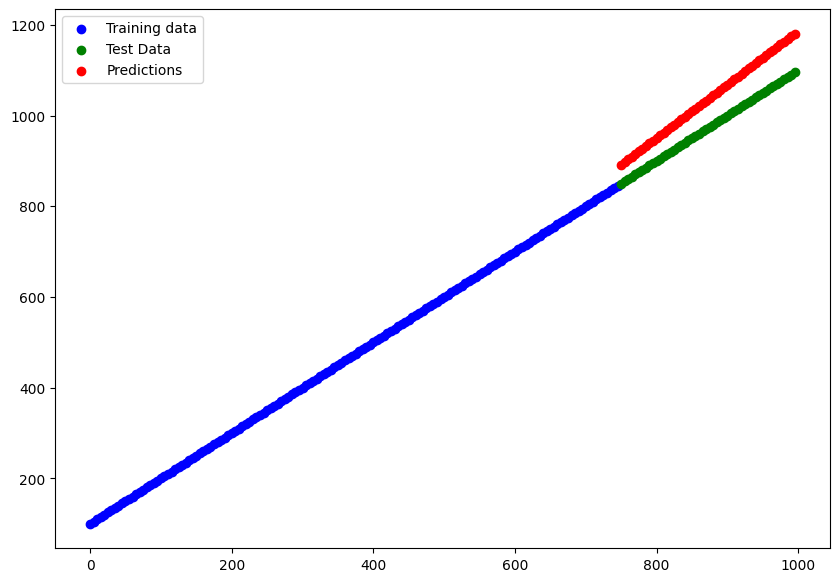

In [22]:
# Make predictions with our model
y_reg_preds = model_3.predict(X_reg_test)

# plot predictions against true values
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="Predictions")
plt.legend()

## The missing piece.. Non-Linearity

In [23]:
tf.random.set_seed(42)

model_4 = keras.Sequential([
    keras.layers.Dense(1, activation=keras.activations.linear)
])

# compile
model_4.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# fit
history = model_4.fit(X, y, epochs=100)

Epoch 1/100


32/32 [==============================] - 2s 6ms/step - loss: 5.9174 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9129 - accuracy: 0.4900
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9098 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8686 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 5.8279 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8288 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8252 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8221 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8206 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8119 - accuracy: 0.4860
Epoch 11/100
32/32 [=

313/313 [==============================] - 1s 2ms/step
Doing dinary classification


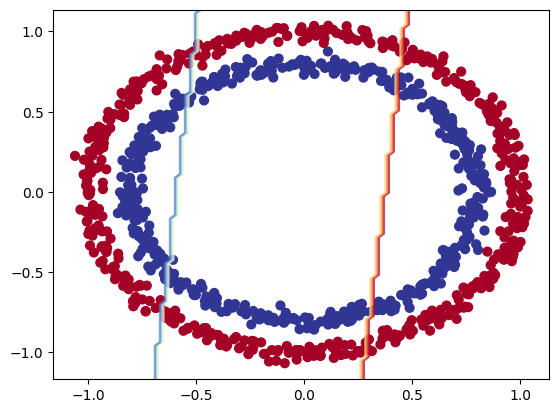

In [24]:
# check model_4's decision boundary
plot_decision_boundary(model_4, X, y)

Here I replicate the model I created from tensorflow playground 

In [25]:
# set the random seed
tf.random.set_seed(42)

# create model
my_test_model = keras.Sequential([
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# compile model
my_test_model.compile(loss=keras.losses.BinaryCrossentropy(),
                      optimizer=keras.optimizers.Adam(learning_rate=0.003),
                      metrics=["accuracy"])

# fit the model
history = my_test_model.fit(X, y, epochs=150)

Epoch 1/150
32/32 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5160
Epoch 2/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5270
Epoch 3/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5220
Epoch 4/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5160
Epoch 5/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5440
Epoch 6/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.5330
Epoch 7/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.7480
Epoch 8/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6485 - accuracy: 0.6610
Epoch 9/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6333 - accuracy: 0.7840
Epoch 10/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6146 - accuracy: 0.7370
Epoch 11/

<Axes: >

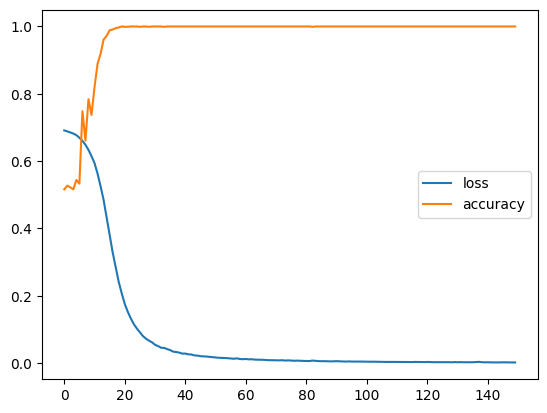

In [26]:
import pandas as pd

pd.DataFrame(history.history).plot()

313/313 [==============================] - 1s 2ms/step
Doing dinary classification


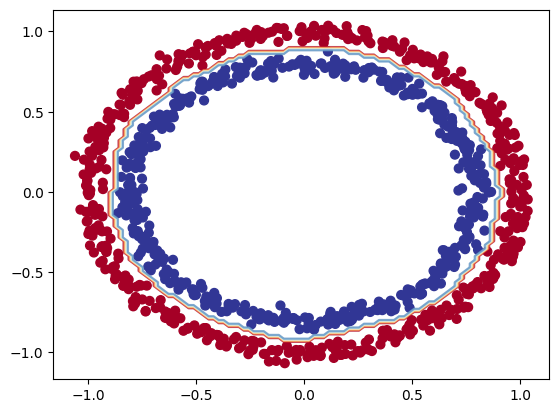

In [27]:
plot_decision_boundary(my_test_model, X, y)

In [28]:
# trying to follow the typical architecture of a classification model
tf.random.set_seed(42)

# 1. Cretae the model
model_5 = keras.Sequential([
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6901 - accuracy: 0.5060
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5060
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5080
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5070
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5100
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5090
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5170
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5310
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5440
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5420
Epoch 11/

In [29]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7400


[0.5580240488052368, 0.7400000095367432]

313/313 [==============================] - 1s 2ms/step
Doing dinary classification


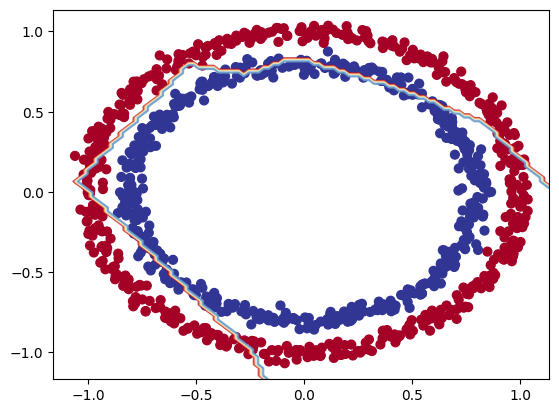

In [30]:
# visualize metrics
plot_decision_boundary(model_5, X, y)

### Now we look at the concept of linear and non-linear functions in action 

In [31]:
# create a toy tensor 
A = tf.cast(tf.range(-10, 10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

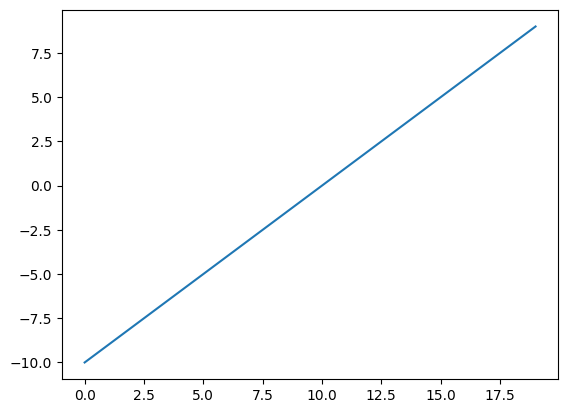

In [32]:
# visualize our toy tensor
plt.plot(A)

In [33]:
# Let's replicate sigmoid : sigmoid = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# use the sigmoid function on our toy tensor
S = sigmoid(A)
S

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

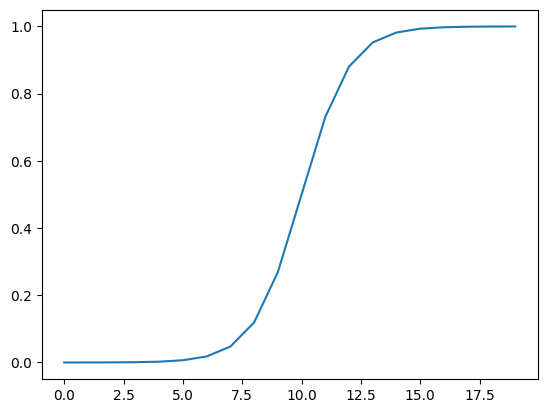

In [34]:
plt.plot(S)

In [35]:
# replicatiing the ReLU function
def relu(x):
    return tf.maximum(0, x)

R = relu(A)
R

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

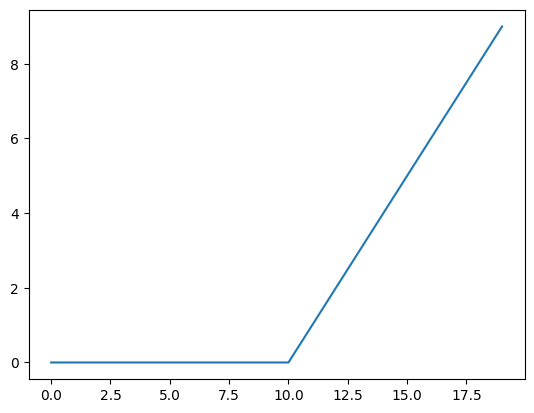

In [36]:
plt.plot(R)

**Note** :A conbination of linear and non-linear functions is one of the key fundamentals in neural networks

Now to evaluating and improving our classification

In [37]:
# First split our data into training and test set
len(X)

1000

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [39]:
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 12        
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# recreate a model
# set random seed
tf.random.set_seed(42)

# create model
model_6 = keras.Sequential([
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

# compile the model
model_6.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# fit the model
history = model_6.fit(X_train, y_train, epochs=25)

Epoch 1/25


25/25 [==============================] - 1s 3ms/step - loss: 0.6961 - accuracy: 0.4812
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.4925
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5213
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5312
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.5400
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.5362
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.5550
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.5975
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6541 - accuracy: 0.5913
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6395 - accuracy: 0.5900
Epoch 11/25
25/25 [===========

In [41]:
# Evaluate the model on the test dataset
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0749 - accuracy: 1.0000


[0.07485734671354294, 1.0]

313/313 [==============================] - 1s 2ms/step
Doing dinary classification
313/313 [==============================] - 1s 2ms/step
Doing dinary classification


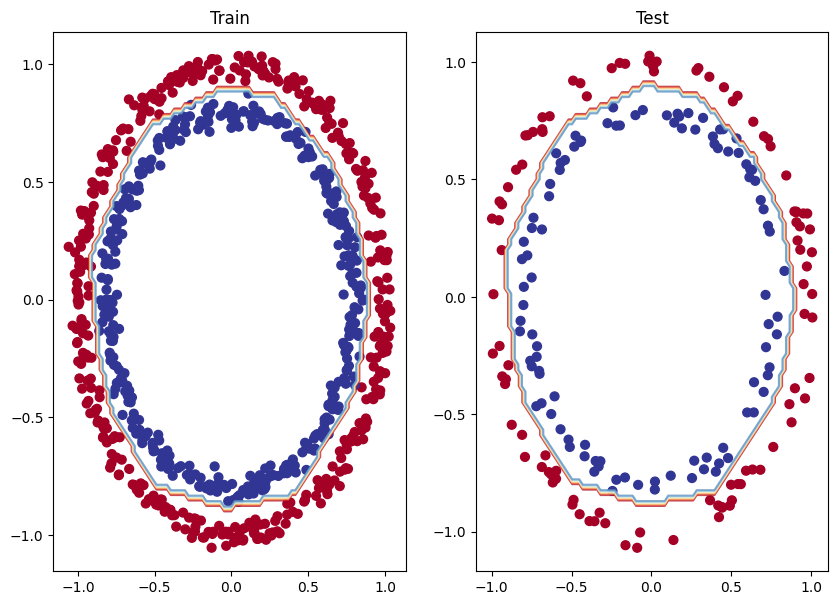

In [42]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_6,
                       X=X_train,
                       y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_6,
                       X=X_test,
                       y=y_test)

## Plotting the training curves

Text(0.5, 1.0, 'Model_6 Loss curves')

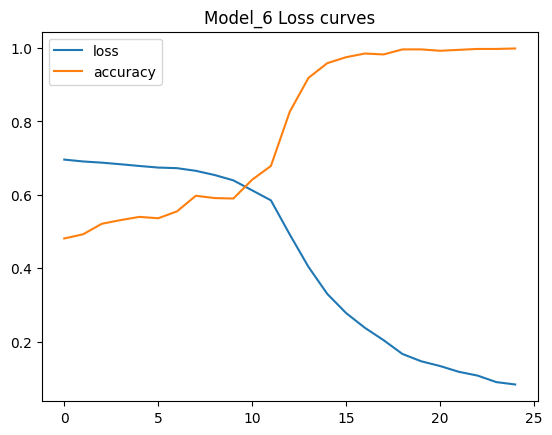

In [43]:
pd.DataFrame(history.history).plot()
plt.title("Model_6 Loss curves")

## Finding the best learning rate

To find the ideal learning rate, we have to folloe the following steps
* A learning rate **callback** - an extra piece of functionality you can add to your model *while* it trains
* Another model
* A modified loss curve plotting function

In [44]:
#  set the random seed
tf.random. set_seed(42)

# create model_7
model_7 = keras.Sequential([
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Adam(),
                metrics=["accuracy"])

# adding the learning rate callback
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

# fit the model
history_7 = model_7.fit(X_train, y_train, callbacks=[lr_scheduler], epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7113 - accuracy: 0.4938 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7096 - accuracy: 0.4938 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.4925 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.4913 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.4900 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7060 - accuracy: 0.4888 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7049 - accuracy: 0.4875 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

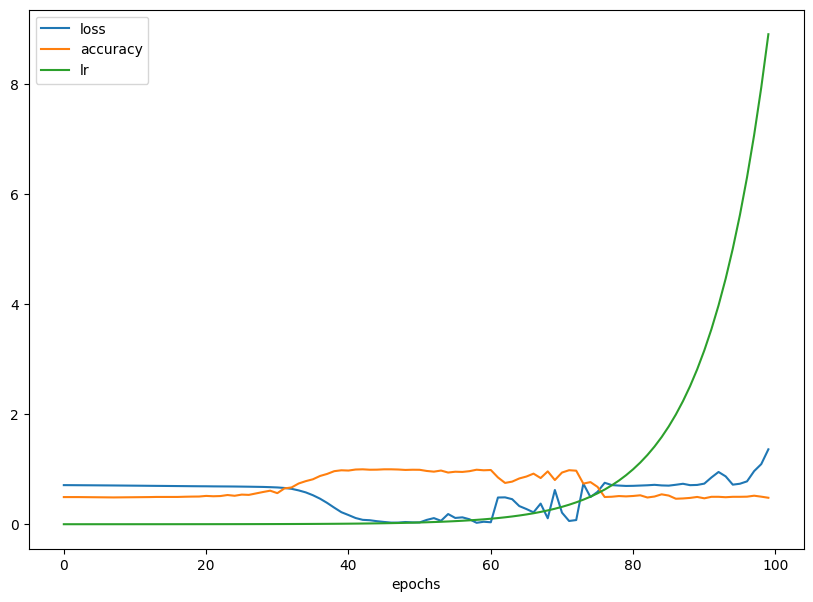

In [45]:
# checkout the history
pd.DataFrame(history_7.history).plot(figsize=(10, 7), xlabel="epochs")

In [46]:
# plot learning rate against loss
lrs = 1e-4 * 10 ** (tf.range(100)/20)
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate Vs Loss')

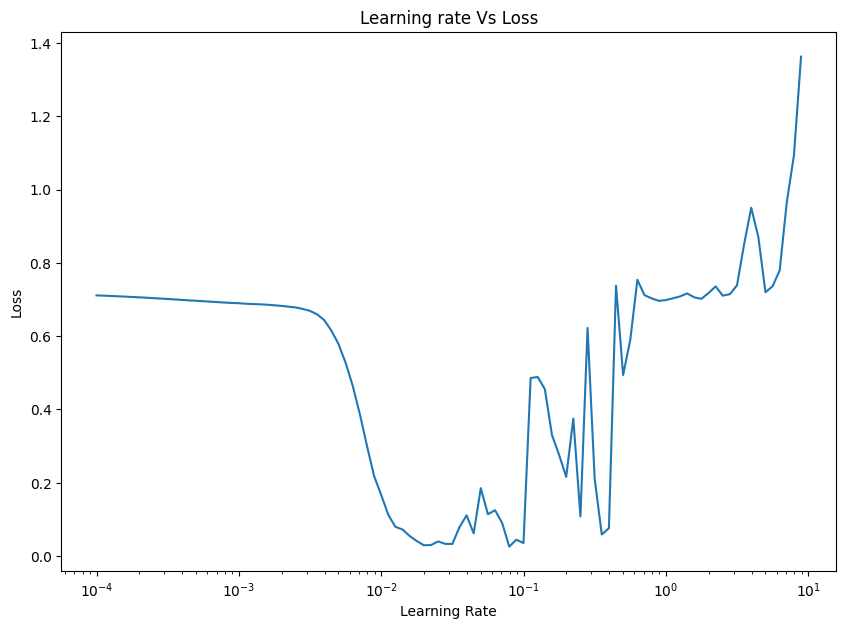

In [47]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_7.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate Vs Loss")

In [48]:
# recreating a model and choosing an ideal learning rate from the above plot
tf.random.set_seed(42)

# creating the model
model_8 = keras.Sequential([
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# compile model_8
model_8.compile(loss=keras.losses.BinaryCrossentropy(),
            optimizer=keras.optimizers.Adam(learning_rate=0.02),
            metrics=["accuracy"])

# fit for 20 epochs
history_8 = model_8.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6886 - accuracy: 0.5263
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6689 - accuracy: 0.5950
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6112 - accuracy: 0.7200
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4903 - accuracy: 0.8587
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3446 - accuracy: 0.9175
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2023 - accuracy: 0.9837
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1166 - accuracy: 0.9937
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0750 - accuracy: 0.9962
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9962
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0429 - accuracy: 0.9925
Epoch 11/20
25/25 [

In [49]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1288 - accuracy: 0.9500


[0.12879036366939545, 0.949999988079071]

In [50]:
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0749 - accuracy: 1.0000


[0.07485734671354294, 1.0]

313/313 [==============================] - 1s 2ms/step
Doing dinary classification
313/313 [==============================] - 1s 2ms/step
Doing dinary classification


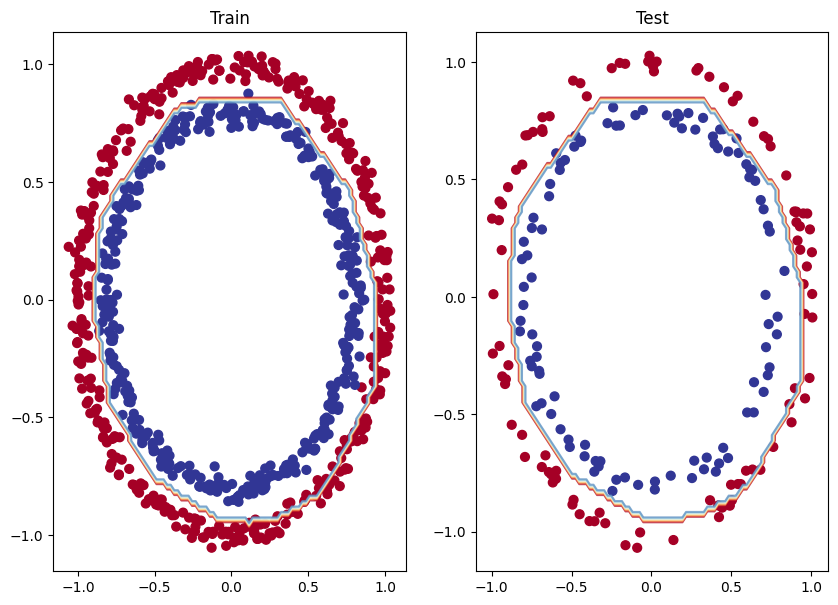

In [51]:
# plot model_8 decision boundaries
plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)  # 1 row, 2 columns, 1st section
plt.title("Train")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_8, X=X_test, y=y_test)
plt.show()

###  Classification evaluation methods
* **Accuracy** : `tf.keras.metrics.Accuracy()` or `sklearn.metrics.accuracy_score()`. Default metric for classification. Not the best for imbalanced classes
* **Precision** : `tf.keras.metrics.Precision()` or `sklearn.metrics.precision_score()`. Higher precision leads to less false positives
* **Recall** : `tf.keras.metrics.Recall()` or `sklearn.metrics.recall_score()`. Higher recall leads to less false negatives
* **F1-score** : `sklearn.metrics.f1_score()`. Combination of precision and recall, usually a good overall metric for a classification model
* **Confusion matrix** : Custom function or `sklearn.metrics.confusion_matrix()`. Used when comparing truth labels to see where a model gets confused. Can be hard to use with large numbers of classes
* **Classification report** : `sklearn.metrics.classification_report()`

In [52]:
# check the accuracy of our model
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on test set : {loss}")
print(f"MOdel accuracy on test set : {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.1288 - accuracy: 0.9500


Model loss on test set : 0.12879036366939545
MOdel accuracy on test set : 95.00%


In [53]:
# check out the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model_8.predict(X_test)
confusion_matrix(y_test, y_pred=y_pred)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [54]:
y_test[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [55]:
y_pred[:10]

array([[1.2711351e-01],
       [4.4948596e-04],
       [9.9978340e-01],
       [9.9993610e-01],
       [4.4931060e-01],
       [4.4733423e-04],
       [2.3171209e-05],
       [9.9685723e-01],
       [4.5197783e-05],
       [1.6019935e-06]], dtype=float32)

Our  predictions array has come out in **prediction probability** form, the standard output from the sigmoid(or softmax) activaton functions

In [56]:
# convert our prediction probabilities to binary format
y_pred_rounded = tf.round(y_pred)
y_pred_rounded[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)>

In [57]:
# Now to create the confusion matrix
confusion_matrix(y_test, y_pred_rounded)

array([[93,  8],
       [ 2, 97]])

Prettify our confusion matrix

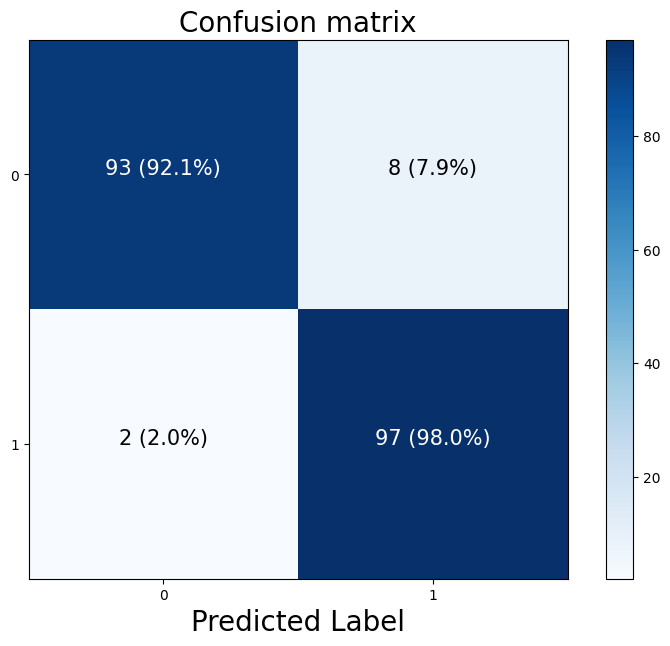

In [58]:
# This confusion matrix code is a remix of scikit_learn's plot_confusion_matrix()

import itertools

figsize = (10, 7)

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rounded)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix
n_classes = cm.shape[0]

#  let's prettify if
fig, ax = plt.subplots(figsize=figsize)
#  create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# label the axes
ax.set(title="Confusion matrix",
       xlabel="Predicted Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# setthreshold for different colors
threshold = ((cm.max() + cm.min()) / 2)

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

# Working with a larger example (multiclass classification)

In [59]:
# Getting the data ready
from keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [60]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [61]:
# show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label :\n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [62]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

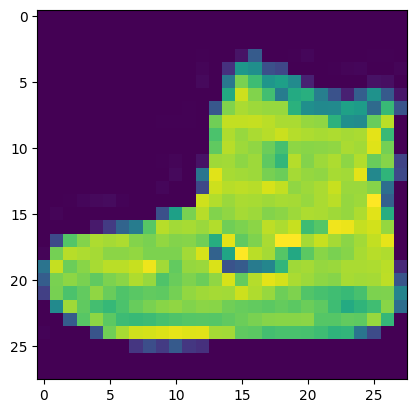

In [63]:
# plot a single sample
plt.imshow(train_data[0])

In [64]:
train_labels[0]

9

In [65]:
# create a list of our labels' indexes to make them human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'T-shirt/top')

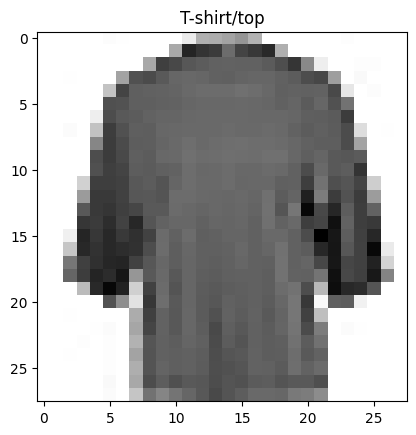

In [66]:
import random

index_of_choice = random.randint(0, 10000)
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

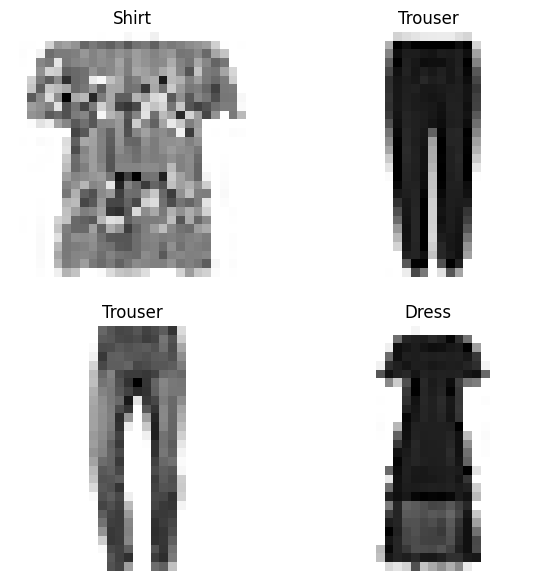

In [67]:
# plot multiple random images of fashion MNIST
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

### Building our multiclass classification model

For the multiclass classification model, the process is similar to a binary classifier, except for a few changes
* Input shape = 28x28 (the shape of one image for this dataset)
* Output shape = 10 (per class)
* Loss function = `tf.keras.losses.CategoricalCrossEntropy()`(ideal for one-hot encoded labels. If labels are numerical use `tf.keras.losses.SparseCategoricalCrossEntropy()`)
* Output layer activation = Softmax

In [68]:
# set random seed
tf.random.set_seed(42)

# Create the model, flatten the data with a Flatten layer
model_9 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

# Compile the model
# Categoric
model_9.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
non_norm_history = model_9.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

2023-12-12 21:20:04.052817: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.3676 - accuracy: 0.0990 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3032 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [69]:
# check the model summary
model_9.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
# check the min and max values of our training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled/normalized, meaning they like to have the numbers in tensors to be between 0 and 1

In [71]:
# We can get our training and testing data between 0 & 1 by dividing by the max
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check min and max values of scaled data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [72]:
# training on scaled data
# set random seed
tf.random.set_seed(42)

# create model
model_10 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

# compile the model
model_10.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=keras.optimizers.Adam(),
                 metrics=['accuracy'])

# fit the model
norm_history = model_10.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

2023-12-12 21:21:22.907333: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 1.2224 - accuracy: 0.5248

2023-12-12 21:21:54.844169: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 18s 4ms/step - loss: 1.2210 - accuracy: 0.5252 - val_loss: 0.8755 - val_accuracy: 0.6517
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7978 - accuracy: 0.6968 - val_loss: 0.7676 - val_accuracy: 0.7172
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7298 - accuracy: 0.7278 - val_loss: 0.7237 - val_accuracy: 0.7283
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6917 - accuracy: 0.7418 - val_loss: 0.6900 - val_accuracy: 0.7450
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6666 - accuracy: 0.7519 - val_loss: 0.6775 - val_accuracy: 0.7531
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6308 - accuracy: 0.7736 - val_loss: 0.6327 - val_accuracy: 0.7770
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5998 - accuracy: 0.7901 - val_loss: 0.6207 - val_accuracy: 0.7833
Ep

<Axes: title={'center': 'Model 10: Normalized data'}>

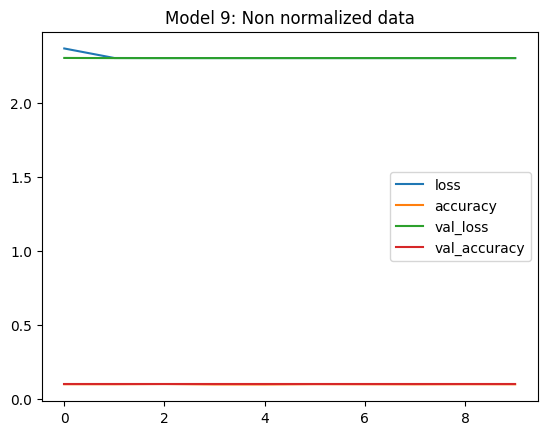

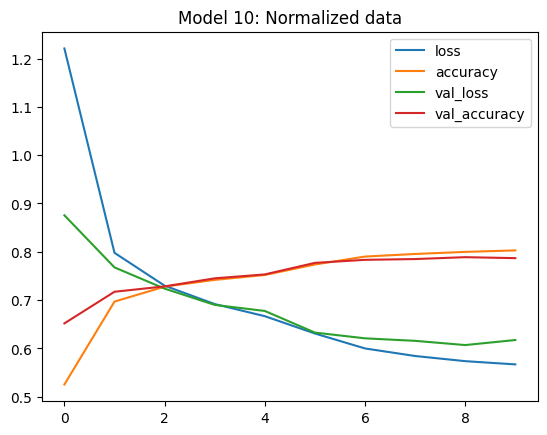

In [73]:
# plotting the loss curves of models 9 and 10

# plot non normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title="Model 9: Non normalized data")
# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Model 10: Normalized data")

In [74]:
## Finding the ideal learning rate
tf.random.set_seed(42)

# create model
model_11 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_11.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler_2 = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# fit model
find_lr_history = model_11.fit(train_data_norm, train_labels, epochs=40,
                                validation_data=(test_data_norm, test_labels),
                                callbacks=[lr_scheduler_2])



2023-12-12 21:23:04.372350: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/40
1868/1875 [============================>.] - ETA: 0s - loss: 1.1551 - accuracy: 0.6123

2023-12-12 21:23:23.353375: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 12s 4ms/step - loss: 1.1536 - accuracy: 0.6129 - val_loss: 0.7878 - val_accuracy: 0.7393 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7331 - accuracy: 0.7503 - val_loss: 0.7220 - val_accuracy: 0.7519 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6850 - accuracy: 0.7665 - val_loss: 0.6881 - val_accuracy: 0.7628 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6608 - accuracy: 0.7733 - val_loss: 0.6720 - val_accuracy: 0.7698 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6440 - accuracy: 0.7789 - val_loss: 0.6550 - val_accuracy: 0.7750 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6300 - accuracy: 0.7842 - val_loss: 0.6658 - val_accuracy: 0.7728 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step 

Text(0.5, 1.0, 'Finding the ideal learning rate')

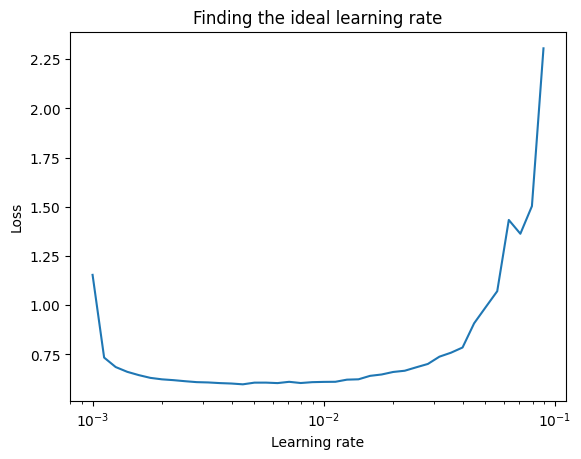

In [75]:
# plot learning rate decay curve

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [76]:
# fitting a model with learning rate 1e-3
import tensorflow as tf
import keras

tf.random.set_seed(42)

# create a model
model_12 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_12.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# fit the model
history_12 = model_12.fit(train_data_norm, train_labels, epochs=20, 
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 19s 5ms/step - loss: 1.3434 - accuracy: 0.4786 - val_loss: 0.8698 - val_accuracy: 0.6819
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7702 - accuracy: 0.7126 - val_loss: 0.7478 - val_accuracy: 0.7201
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6945 - accuracy: 0.7391 - val_loss: 0.7070 - val_accuracy: 0.7357
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6631 - accuracy: 0.7557 - val_loss: 0.6906 - val_accuracy: 0.7534
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6433 - accuracy: 0.7667 - val_loss: 0.6642 - val_accuracy: 0.7664
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6278 - accuracy: 0.7735 - val_loss: 0.6582 - val_accuracy: 0.7710
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6172 - accuracy: 0.7793 - val_loss: 0.6690 - val_accuracy

### Evaluating our multi-class classification model
We could:
* Evaluate its performance using other classification metrics e.g confusion matrix
* Asses some of its predictions(through visualization)
* Improve its results(by training it for longer or changing the architecture)
* save and export it for use in an application

In [77]:
# Create our confusion matrix

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    # create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix
    n_classes = cm.shape[0]

    #  let's prettify if
    fig, ax = plt.subplots(figsize=figsize)
    #  create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # set labels to classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # label the axes
    ax.set(title="Confusion matrix",
        xlabel="Predicted Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # setthreshold for different colors
    threshold = ((cm.max() + cm.min()) / 2)

    # plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

**Note** : If your model was trained on normalized data, you have to test it on normalized data

In [80]:
# make some predictions 
y_probs = model_12.predict(test_data_norm) # y_probs are the prediction probabilities
y_probs[:5]

313/313 [==============================] - 13s 40ms/step


array([[8.6348706e-21, 1.1988444e-09, 1.5317149e-12, 1.0011745e-18,
        2.8348366e-09, 2.7421263e-01, 9.2333939e-11, 7.7396654e-02,
        2.8773012e-02, 6.1961776e-01],
       [1.7882441e-05, 8.5512096e-14, 8.7511826e-01, 5.8520686e-09,
        9.7941644e-02, 8.6587040e-12, 2.6806474e-02, 1.1456781e-17,
        1.1578824e-04, 2.9956876e-26],
       [1.4956890e-02, 9.7475427e-01, 1.7470539e-04, 6.2376088e-03,
        3.4021497e-05, 1.5234145e-03, 2.3006208e-03, 5.5187147e-06,
        9.8488463e-06, 3.0188830e-06],
       [1.4956890e-02, 9.7475427e-01, 1.7470539e-04, 6.2376088e-03,
        3.4021497e-05, 1.5234145e-03, 2.3006208e-03, 5.5187147e-06,
        9.8488463e-06, 3.0188830e-06],
       [1.6050431e-01, 3.6937883e-04, 1.9159026e-01, 2.8154710e-02,
        9.2860557e-02, 3.2168762e-05, 5.2406228e-01, 6.2109882e-09,
        2.4263160e-03, 3.3371157e-11]], dtype=float32)

In [81]:
test_labels[0]

9

In [82]:
# convert all prediction probabilities to integers
y_preds = y_probs.argmax(axis=1)
# view y_preds
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [84]:
y_preds[:10] == test_labels[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [86]:
# TODO : Recreate the accuracy score

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[745,  11,  32,  79,   9,   0, 118,   0,   6,   0],
       [ 19, 914,   0,  53,   1,   0,  13,   0,   0,   0],
       [ 30,   0, 567,  19, 173,   0, 210,   0,   1,   0],
       [ 32,  10,   5, 820,  35,   0,  92,   0,   6,   0],
       [  1,   0,  91,  36, 745,   0, 121,   0,   6,   0],
       [  0,   3,   0,   1,   0, 934,   0,  38,   7,  17],
       [152,   0, 110,  62, 254,   0, 415,   0,   7,   0],
       [  0,   0,   0,   0,   0,  47,   0, 912,   5,  36],
       [  3,   3,  10,   5,  55,   7,  16,   3, 898,   0],
       [  0,   1,   0,   1,   1,  22,   0,  41,   7, 927]])

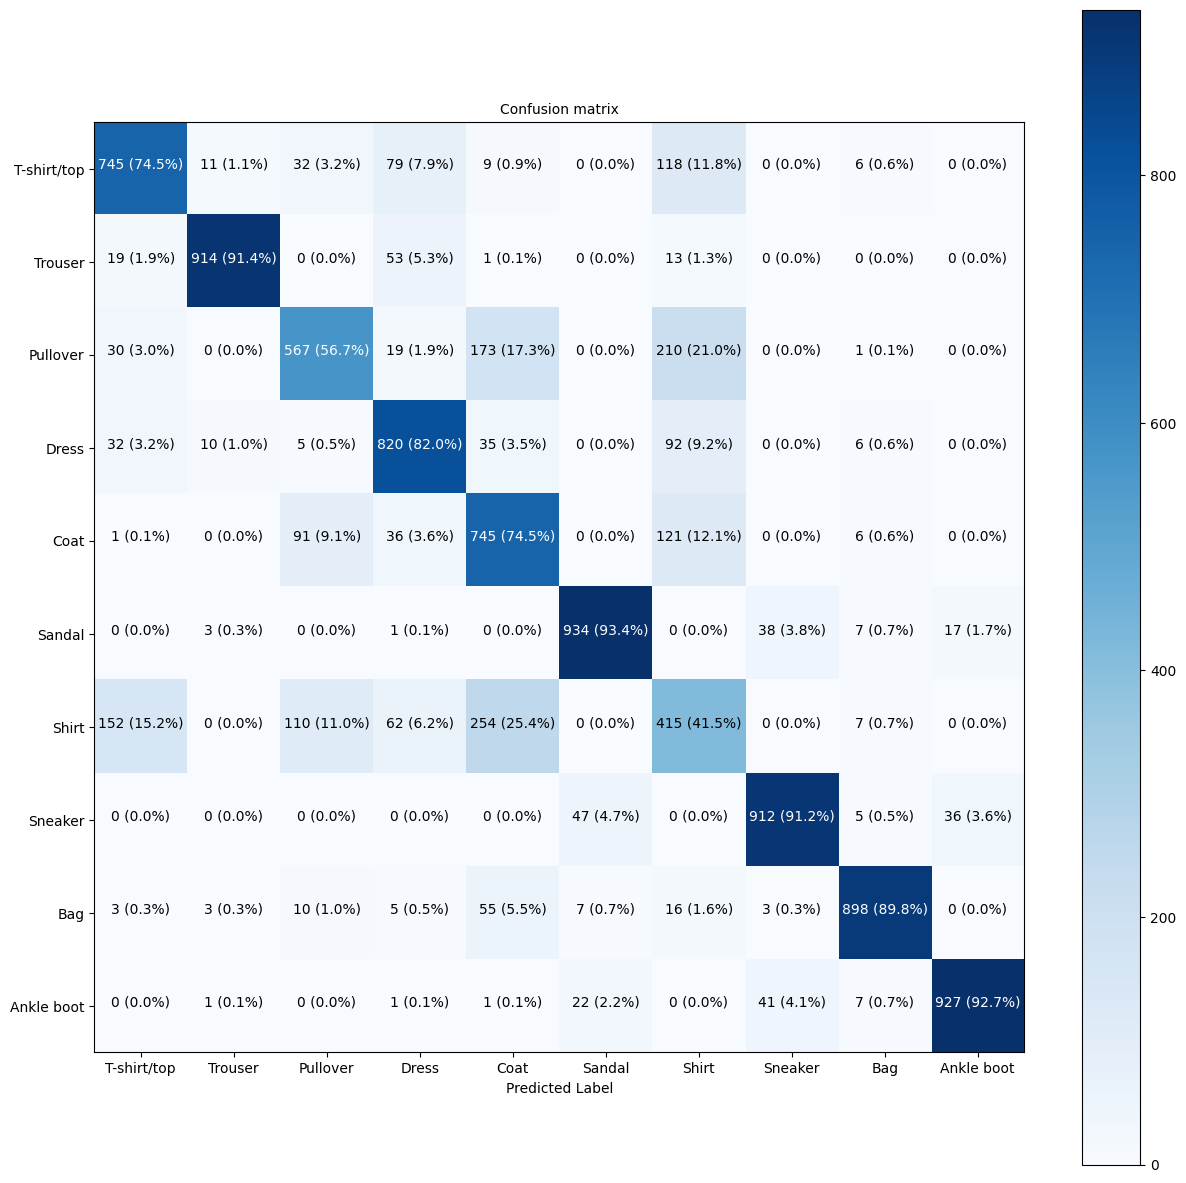

In [90]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)